# Twitter Sentiment Analysis in Bahasa Indonesia

This notebook allow you to run the codes need to do Twitter Senitment Analysis in Bahasa Indonesia. Do note there are cells (it will be pointed out in the comments) you do not need to run the analysises.

In [1]:
import translators as ts
from os import path
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import pandas as pd
from transformers import pipeline
import plotly.express as px

ts._google.language_map

Using Singapore server backend.


This is the scapper portion of the code. Note that the geolocation is used, with indonesia as the language and date range entered.

In [2]:
import snscrape.modules.twitter as sntwitter

# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('geocode:1.2494,103.8303,2km lang:id since:2019-01-01 until:2020-01-01').get_items()):
    if i>5000:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username])

# sample search string
# sentosa (#sentosa) lang:id since:2022-01-01 until:2022-03-31'
# https://github.com/igorbrigadir/twitter-advanced-search
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/geo#place
# with the tweet id you can punch it into a browser to view the tweet post twitter.com/anyuser/status/{tweet ID}

# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

Time zone is removed in the cell below as part of the code is unable to deal with time zone.

In [3]:
removed_tzone=tweets_df2
# remove time zonne as excel cannot handle time zone
removed_tzone['Datetime'] = removed_tzone['Datetime'].dt.tz_localize(None)
tweetid= removed_tzone['Tweet Id']

removed_tzone

,Datetime,Tweet Id,Text,Username
0,2019-12-31 17:27:32,1212062746663104514,Aku dan temen tapi ada rasa mengucapkan happy ...,banteths
1,2019-12-31 17:21:57,1212061339906191360,Aku dan temen2 paudQ mengucapkan selamat Tahun...,banteths
2,2019-12-31 17:13:57,1212059327609094144,Aku dan temen genk motorQ mengucapkan Selamat ...,banteths
3,2019-12-31 17:02:38,1212056479617806337,Terimakasih sudah menjadi penutup 2019ku yang ...,noviputrii25
4,2019-12-31 16:40:10,1212050824475615232,Bye 2019 ↔ Welcome 2020 💕\n.\nSemoga kita semu...,Vinnasaragi13
...,...,...,...,...
1043,2019-01-02 08:04:05,1080374154447081473,@susipudjiastuti salam bu,Yudi70117508
1044,2019-01-01 11:01:24,1080056390855675905,Coba liat-liat peluang mana tahu ada lokasi bi...,Zulkifli_H
1045,2019-01-01 07:31:00,1080003440510554112,Big Merlion.\n#merlion \n#sentosaisland \n#sin...,AKKEY52147106
1046,2019-01-01 06:57:15,1079994946990624770,🤘🤙🏽 🇸🇬 #singapore 01.01.19 ph zlateshka 😉🤙🏽...,Lex_Kors1n


Run the cell below if you want to save the file to excel. Note that 2 files are generated. The main excel contains all the extracted tweets and the second file is the ID of the tweet message. Due to the tweet ID being too long. it has be to saved separately

In [ ]:
removed_tzone.to_excel('tweets.xlsx', sheet_name='sheet1', index=False)
# saving results to excel as emojis are unable to be saved in csv form
tweetid.to_csv('tweetsID.csv', index=False)
# due to the tweet ID being too long. it has be to saved separately

In [ ]:
# code for reading excel
removed_tzone=pd.read_excel('geo location 2019 tweets wo emoji translated.xlsx')  

removed_tzone

In [7]:
text_col=removed_tzone
text_col

,Datetime,Tweet Id,Text,Username
0,2019-12-31 17:27:32,1212062746663104514,Aku dan temen tapi ada rasa mengucapkan happy ...,banteths
1,2019-12-31 17:21:57,1212061339906191360,Aku dan temen2 paudQ mengucapkan selamat Tahun...,banteths
2,2019-12-31 17:13:57,1212059327609094144,Aku dan temen genk motorQ mengucapkan Selamat ...,banteths
3,2019-12-31 17:02:38,1212056479617806337,Terimakasih sudah menjadi penutup 2019ku yang ...,noviputrii25
4,2019-12-31 16:40:10,1212050824475615232,Bye 2019 ↔ Welcome 2020 💕\n.\nSemoga kita semu...,Vinnasaragi13
...,...,...,...,...
1043,2019-01-02 08:04:05,1080374154447081473,@susipudjiastuti salam bu,Yudi70117508
1044,2019-01-01 11:01:24,1080056390855675905,Coba liat-liat peluang mana tahu ada lokasi bi...,Zulkifli_H
1045,2019-01-01 07:31:00,1080003440510554112,Big Merlion.\n#merlion \n#sentosaisland \n#sin...,AKKEY52147106
1046,2019-01-01 06:57:15,1079994946990624770,🤘🤙🏽 🇸🇬 #singapore 01.01.19 ph zlateshka 😉🤙🏽...,Lex_Kors1n


A new column is for the translation of the tweets to English for reference. Note that this might take sometime depending on number of rows as it uses Google translate API to translate the tweets. (1000 rows takes about 22 to 25 minutes)

In [8]:
text_col['english_text'] = text_col['Text'].apply(lambda x: ts.google(x, from_language='id', to_language='en'))

text_col

,Datetime,Tweet Id,Text,Username,english_text
0,2019-12-31 17:27:32,1212062746663104514,Aku dan temen tapi ada rasa mengucapkan happy ...,banteths,Me and my friend but there is a sense of sayin...
1,2019-12-31 17:21:57,1212061339906191360,Aku dan temen2 paudQ mengucapkan selamat Tahun...,banteths,Me and my friends PAUDQ wish you a Happy New Y...
2,2019-12-31 17:13:57,1212059327609094144,Aku dan temen genk motorQ mengucapkan Selamat ...,banteths,Me and my friend Genk Motorq wish you a Happy ...
3,2019-12-31 17:02:38,1212056479617806337,Terimakasih sudah menjadi penutup 2019ku yang ...,noviputrii25,Thank you for being the closing of my beautifu...
4,2019-12-31 16:40:10,1212050824475615232,Bye 2019 ↔ Welcome 2020 💕\n.\nSemoga kita semu...,Vinnasaragi13,BYE 2019 ↔ WELCOME 2020 💕 \n . \n Hopefully we...
...,...,...,...,...,...
1043,2019-01-02 08:04:05,1080374154447081473,@susipudjiastuti salam bu,Yudi70117508,@susipudjiastuti greetings ma'am
1044,2019-01-01 11:01:24,1080056390855675905,Coba liat-liat peluang mana tahu ada lokasi bi...,Zulkifli_H,Try to look at the opportunity which knows the...
1045,2019-01-01 07:31:00,1080003440510554112,Big Merlion.\n#merlion \n#sentosaisland \n#sin...,AKKEY52147106,Big Merlion. \n #merlion \n #Sentosaisland \n ...
1046,2019-01-01 06:57:15,1079994946990624770,🤘🤙🏽 🇸🇬 #singapore 01.01.19 ph zlateshka 😉🤙🏽...,Lex_Kors1n,🤘🤙🏽 🇸🇬 #Singapore 01.01.19 PH ZLATESHKA 😉🤙🏽 @ ...


Here the emojis and emoticon are transformed into English.

In [11]:
# for name, values in removed_tzone["Text"].iteritems():
#     print(values)
import demoji
# test_tweet = removed_tzone["Text"]
# test_tweet
n=0
for v in text_col["Text"]:
    raw_tweet = str(v)
    tweet_removed_emoji = demoji.replace_with_desc(raw_tweet)
    text_col.loc[n,"Text"] = tweet_removed_emoji
    n+=1

text_col

,Datetime,Tweet Id,Text,Username,english_text
0,2019-12-31 17:27:32,1212062746663104514,Aku dan temen tapi ada rasa mengucapkan happy ...,banteths,Me and my friend but there is a sense of sayin...
1,2019-12-31 17:21:57,1212061339906191360,Aku dan temen2 paudQ mengucapkan selamat Tahun...,banteths,Me and my friends PAUDQ wish you a Happy New Y...
2,2019-12-31 17:13:57,1212059327609094144,Aku dan temen genk motorQ mengucapkan Selamat ...,banteths,Me and my friend Genk Motorq wish you a Happy ...
3,2019-12-31 17:02:38,1212056479617806337,Terimakasih sudah menjadi penutup 2019ku yang ...,noviputrii25,Thank you for being the closing of my beautifu...
4,2019-12-31 16:40:10,1212050824475615232,Bye 2019 :left-right arrow: Welcome 2020 :two ...,Vinnasaragi13,BYE 2019 ↔ WELCOME 2020 💕 \n . \n Hopefully we...
...,...,...,...,...,...
1043,2019-01-02 08:04:05,1080374154447081473,@susipudjiastuti salam bu,Yudi70117508,@susipudjiastuti greetings ma'am
1044,2019-01-01 11:01:24,1080056390855675905,Coba liat-liat peluang mana tahu ada lokasi bi...,Zulkifli_H,Try to look at the opportunity which knows the...
1045,2019-01-01 07:31:00,1080003440510554112,Big Merlion.\n#merlion \n#sentosaisland \n#sin...,AKKEY52147106,Big Merlion. \n #merlion \n #Sentosaisland \n ...
1046,2019-01-01 06:57:15,1079994946990624770,:sign of the horns::call me hand: medium skin ...,Lex_Kors1n,🤘🤙🏽 🇸🇬 #Singapore 01.01.19 PH ZLATESHKA 😉🤙🏽 @ ...


The english words converted from the emojis and emoticons are converted back into Bahasa Indonesia. (1000 rows takes about 22 to 25 minutes)

In [18]:
text_col['FullText'] = text_col['Text'].apply(lambda x: ts.google(x, from_language='en', to_language='id'))

text_col

,Datetime,Tweet Id,Text,Username,english_text,FullText
0,2019-12-31 17:27:32,1212062746663104514,Aku dan temen tapi ada rasa mengucapkan happy ...,banteths,Me and my friend but there is a sense of sayin...,Aku Dan Temen Tapi Ada Rasa Mengucapkan Selama...
1,2019-12-31 17:21:57,1212061339906191360,Aku dan temen2 paudQ mengucapkan selamat Tahun...,banteths,Me and my friends PAUDQ wish you a Happy New Y...,AKU dan TEMEN2 PAUDQ MENGUCAPKAN SELAMAT TAHUN...
2,2019-12-31 17:13:57,1212059327609094144,Aku dan temen genk motorQ mengucapkan Selamat ...,banteths,Me and my friend Genk Motorq wish you a Happy ...,AKu Dan Temen Genk Motorq Mengucapkan Selamat ...
3,2019-12-31 17:02:38,1212056479617806337,Terimakasih sudah menjadi penutup 2019ku yang ...,noviputrii25,Thank you for being the closing of my beautifu...,Terimakasih Suda Menjadi Penutup 2019ku Yang I...
4,2019-12-31 16:40:10,1212050824475615232,Bye 2019 :left-right arrow: Welcome 2020 :two ...,Vinnasaragi13,BYE 2019 ↔ WELCOME 2020 💕 \n . \n Hopefully we...,Bye 2019: Panah Kiri: Selamat Datang 2020: Dua...
...,...,...,...,...,...,...
1043,2019-01-02 08:04:05,1080374154447081473,@susipudjiastuti salam bu,Yudi70117508,@susipudjiastuti greetings ma'am,@susipudjiastuti salam bu
1044,2019-01-01 11:01:24,1080056390855675905,Coba liat-liat peluang mana tahu ada lokasi bi...,Zulkifli_H,Try to look at the opportunity which knows the...,COBA LIAT-LIAT PELUANG MANA TAHU ADA LOKASI BI...
1045,2019-01-01 07:31:00,1080003440510554112,Big Merlion.\n#merlion \n#sentosaisland \n#sin...,AKKEY52147106,Big Merlion. \n #merlion \n #Sentosaisland \n ...,Merlion besar. \n #merlion \n #Sentosaisland \...
1046,2019-01-01 06:57:15,1079994946990624770,:sign of the horns::call me hand: medium skin ...,Lex_Kors1n,🤘🤙🏽 🇸🇬 #Singapore 01.01.19 PH ZLATESHKA 😉🤙🏽 @ ...,: Tanda tanduk :: Call Me Hand: Medium Skin To...


Run the code below if you want to save the dataframe.

In [ ]:
tweetid= removed_tzone['Tweet Id']

removed_tzone.to_excel('tweets wo emoji.xlsx', sheet_name='sheet1', index=False)


The next few codes below are setting up for word cloud display. This will be used to identify keywords used in the tweets and assists to check if there are iirelevant tweets and how much of them are irrelevant.

In [19]:
t_df = pd.DataFrame(text_col, columns = ['english_text'])

t_df

,english_text
0,Me and my friend but there is a sense of sayin...
1,Me and my friends PAUDQ wish you a Happy New Y...
2,Me and my friend Genk Motorq wish you a Happy ...
3,Thank you for being the closing of my beautifu...
4,BYE 2019 ↔ WELCOME 2020 💕 \n . \n Hopefully we...
...,...
1043,@susipudjiastuti greetings ma'am
1044,Try to look at the opportunity which knows the...
1045,Big Merlion. \n #merlion \n #Sentosaisland \n ...
1046,🤘🤙🏽 🇸🇬 #Singapore 01.01.19 PH ZLATESHKA 😉🤙🏽 @ ...


In [20]:
text = t_df["english_text"].to_string(index=False)
text_raw = text_col["FullText"].to_string(index=False)
print ("There are {} words in the combination of all tweets.".format(len(text)))
print ("There are {} words in the combination of all tweets.".format(len(text_raw)))

There are 53447 words in the combination of all tweets.
There are 53447 words in the combination of all tweets.


The first word cloud is completed with the tranalated column and the second is the original tweet

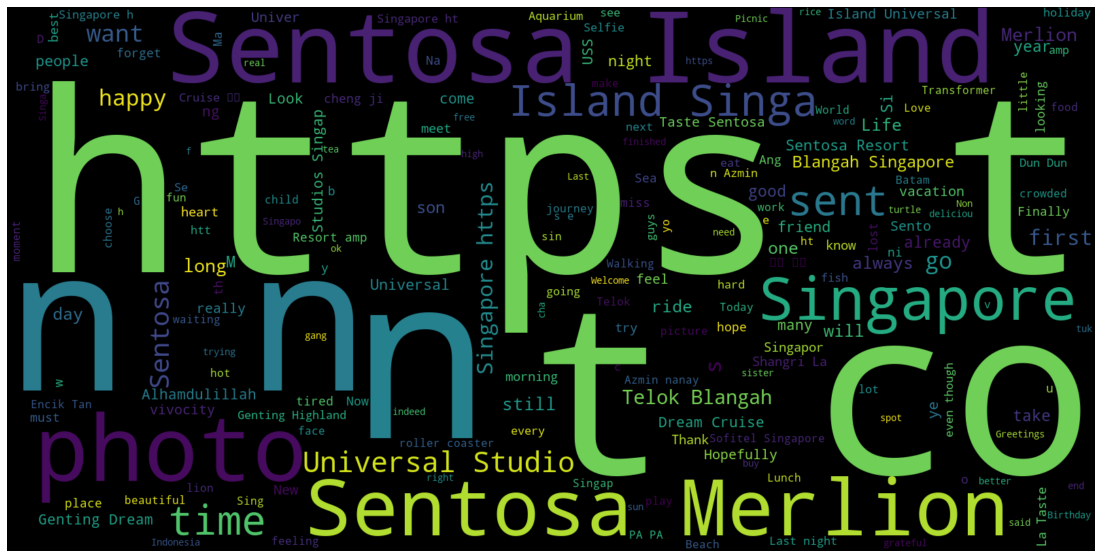

In [21]:
wordcloud = WordCloud(width=1600, height=800).generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

plt.show()

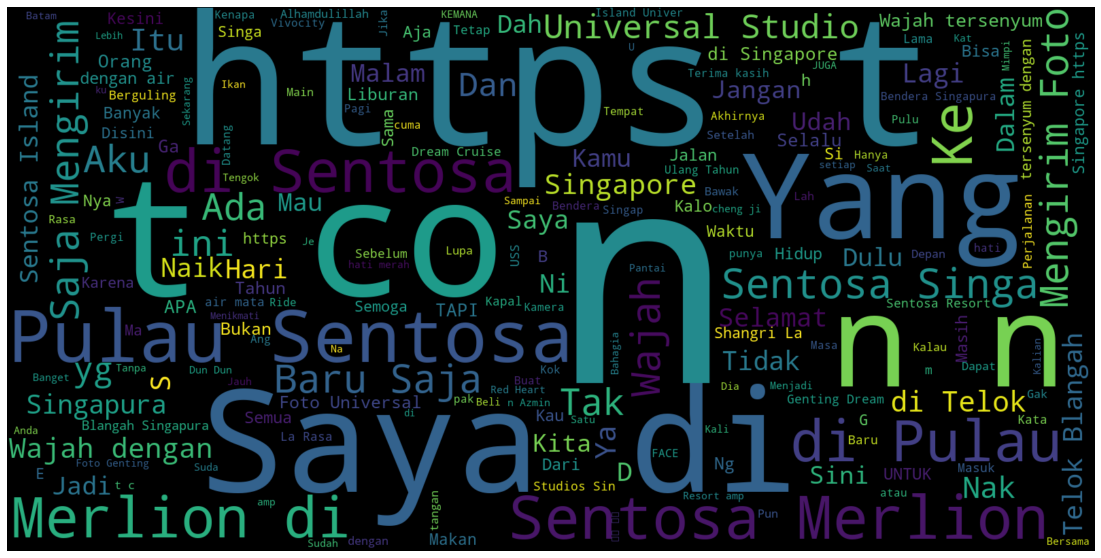

In [22]:
wordcloud_raw = WordCloud(width=1600, height=800).generate(text_raw)

plt.figure(figsize=[20,10])
plt.imshow(wordcloud_raw,interpolation='bilinear')
plt.axis("off")

plt.show()

In [23]:
word_count = WordCloud().process_text(text)

word_count

{'friend': 11,
 'sense': 2,
 'saying': 1,
 'PAUDQ': 1,
 'wish': 2,
 'happy': 22,
 'New': 9,
 'ye': 11,
 'Genk': 1,
 'Motorq': 1,
 'n': 114,
 'Thank': 8,
 'closing': 2,
 'beautiful': 5,
 'BYE': 1,
 'Welcome': 4,
 'Hopefully': 9,
 'Rain': 2,
 'cover': 2,
 'year': 12,
 'Earth': 1,
 'bathed': 1,
 'fairy': 1,
 's': 22,
 'DTG': 2,
 'Lun': 1,
 'Caption': 1,
 'Love': 5,
 'kajolatun': 1,
 'less': 3,
 'height': 2,
 'yer': 1,
 'tomcruise': 1,
 'Ma': 7,
 'HappyNewyear2020': 1,
 'Singapore': 42,
 'Sakura': 1,
 'https': 4,
 'indeed': 4,
 'lesen': 1,
 'motorbike': 1,
 'tujercaption': 1,
 'face': 5,
 'cristiano': 2,
 'unable': 2,
 'serve': 2,
 'alrea': 1,
 'queen': 2,
 'still': 15,
 'looking': 7,
 'social': 2,
 'next': 6,
 'go': 23,
 'OKEI': 1,
 'Genting': 2,
 'photo': 59,
 'almost': 3,
 'similar': 2,
 'b': 7,
 'many': 10,
 'moment': 5,
 'always': 14,
 'y': 7,
 'Assisting': 1,
 'Sempena': 1,
 'Birthday': 4,
 'ABG': 1,
 'Nazri': 1,
 'Sat': 1,
 'cloves': 1,
 'amp': 6,
 'Tri': 2,
 'radenrauf': 1,
 'visit

In [24]:
word_count_raw = WordCloud().process_text(text_raw)

word_count_raw

{'Aku': 35,
 'Dan': 27,
 'TAPI': 14,
 'Ada': 34,
 'Rasa': 8,
 'Selamat': 17,
 'TEMEN2': 1,
 'PAUDQ': 1,
 'Tahun': 13,
 'Genk': 1,
 'Motorq': 1,
 'Terimakasih': 1,
 'Suda': 6,
 'Menjadi': 6,
 'Penutup': 2,
 '2019ku': 1,
 'Yang': 56,
 'Bye': 1,
 'Datang': 7,
 'dua': 4,
 'hujan': 3,
 'n': 108,
 'Bumi': 2,
 'Bermandikan': 1,
 'Peri': 1,
 'Baru': 9,
 'Semoga': 10,
 'yg': 27,
 'dtg': 2,
 'ini': 33,
 'Ang': 7,
 'Tak': 34,
 'Larat': 1,
 'Barat': 4,
 'Caption': 1,
 'Wajah': 40,
 'menyeringai': 3,
 'deng': 2,
 'Lebih': 5,
 'Kurang': 2,
 'Jer': 2,
 'Ketinggian': 1,
 'Kita': 15,
 'Yer': 1,
 'tomcruise': 1,
 'happynewyear2020': 1,
 'di': 5,
 'Singapore': 20,
 'Sakura': 1,
 'https': 10,
 'Memang': 4,
 'Lesen': 1,
 'Motor': 2,
 'tujercaption': 1,
 'Muka': 3,
 'cristiano': 2,
 'kuasa': 1,
 'Nak': 23,
 'melayan': 1,
 'Dah': 16,
 'S': 19,
 'dengan': 8,
 'ratu': 2,
 'Masih': 12,
 'menari': 2,
 'pegawai': 1,
 'media': 1,
 'sos': 1,
 'Depan': 8,
 'Pergi': 7,
 'Lagi': 18,
 'Okei': 1,
 'Hig': 1,
 'Iya': 4,
 

From the word cloud, we can use the words that are iirelevant to Sentosa and using the code we can replace those words by replacing the text in the brackets below.

- text_col=text_col[~text_col.english_text.str.contains("__vivocity__")] 

Replacing the word vivocity with another word that is iirelevant to remove those tweets from our scrapped results shown below.

- text_col=text_col[~text_col.english_text.str.contains("__telok__")] 

In [51]:
text_col=text_col[~text_col.english_text.str.contains("vivocity")]
# removing relevant tweets using the word cloud for reference


In [53]:
text_col

,Datetime,Tweet Id,Text,Username,english_text,FullText,sentiment,score
0,2019-12-31 17:27:32,1212062746663104514,Aku dan temen tapi ada rasa mengucapkan happy ...,banteths,Me and my friend but there is a sense of sayin...,Aku Dan Temen Tapi Ada Rasa Mengucapkan Selama...,0,0.983
1,2019-12-31 17:21:57,1212061339906191360,Aku dan temen2 paudQ mengucapkan selamat Tahun...,banteths,Me and my friends PAUDQ wish you a Happy New Y...,AKU dan TEMEN2 PAUDQ MENGUCAPKAN SELAMAT TAHUN...,0,0.997
2,2019-12-31 17:13:57,1212059327609094144,Aku dan temen genk motorQ mengucapkan Selamat ...,banteths,Me and my friend Genk Motorq wish you a Happy ...,AKu Dan Temen Genk Motorq Mengucapkan Selamat ...,0,0.990
3,2019-12-31 17:02:38,1212056479617806337,Terimakasih sudah menjadi penutup 2019ku yang ...,noviputrii25,Thank you for being the closing of my beautifu...,Terimakasih Suda Menjadi Penutup 2019ku Yang I...,0,0.990
4,2019-12-31 16:40:10,1212050824475615232,Bye 2019 :left-right arrow: Welcome 2020 :two ...,Vinnasaragi13,BYE 2019 ↔ WELCOME 2020 💕 \n . \n Hopefully we...,Bye 2019: Panah Kiri: Selamat Datang 2020: Dua...,0,0.744
...,...,...,...,...,...,...,...,...
1043,2019-01-02 08:04:05,1080374154447081473,@susipudjiastuti salam bu,Yudi70117508,@susipudjiastuti greetings ma'am,@susipudjiastuti salam bu,1,0.962
1044,2019-01-01 11:01:24,1080056390855675905,Coba liat-liat peluang mana tahu ada lokasi bi...,Zulkifli_H,Try to look at the opportunity which knows the...,COBA LIAT-LIAT PELUANG MANA TAHU ADA LOKASI BI...,0,0.980
1045,2019-01-01 07:31:00,1080003440510554112,Big Merlion.\n#merlion \n#sentosaisland \n#sin...,AKKEY52147106,Big Merlion. \n #merlion \n #Sentosaisland \n ...,Merlion besar. \n #merlion \n #Sentosaisland \...,0,0.561
1046,2019-01-01 06:57:15,1079994946990624770,:sign of the horns::call me hand: medium skin ...,Lex_Kors1n,🤘🤙🏽 🇸🇬 #Singapore 01.01.19 PH ZLATESHKA 😉🤙🏽 @ ...,: Tanda tanduk :: Call Me Hand: Medium Skin To...,1,0.996


The next few codes are for preparation for running Sentiment Analysis.

In [25]:
pretrained_name = "sahri/indonesiasentiment"

nlp = pipeline("sentiment-analysis",
              model=pretrained_name,
              tokenizer=pretrained_name)

In [57]:
def sentiment_analysis_label(FullText):
    '''
    Sentiment analysis labelling
    0 - positive
    1 - negative
    '''
    output = nlp(FullText)
    if output[0]['label'] == 'positive':
        label = str('positive')
    elif output[0]['label'] == 'neutral':
        label = str('neutral')
    else:
        label = str('negative')
    return label

In [43]:
def sentiment_analysis_score(FullText):
    '''
    Return sentiment analysis score
    '''
    output = nlp(FullText)
    return round(output[0]['score'], 3)

In [58]:
text_col['sentiment'] = text_col['FullText'].apply(sentiment_analysis_label)

C:\Users\Kelvin\AppData\Local\Temp/ipykernel_23164/379579593.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
text_col['sentiment'].value_counts(ascending=False)

positive    429
neutral     409
negative    193
Name: sentiment, dtype: int64

In [60]:
text_col['score'] = text_col['FullText'].apply(sentiment_analysis_score)

C:\Users\Kelvin\AppData\Local\Temp/ipykernel_23164/2216666349.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
text_col

,Datetime,Tweet Id,Text,Username,english_text,FullText,sentiment,score
0,2019-12-31 17:27:32,1212062746663104514,Aku dan temen tapi ada rasa mengucapkan happy ...,banteths,Me and my friend but there is a sense of sayin...,Aku Dan Temen Tapi Ada Rasa Mengucapkan Selama...,positive,0.983
1,2019-12-31 17:21:57,1212061339906191360,Aku dan temen2 paudQ mengucapkan selamat Tahun...,banteths,Me and my friends PAUDQ wish you a Happy New Y...,AKU dan TEMEN2 PAUDQ MENGUCAPKAN SELAMAT TAHUN...,positive,0.997
2,2019-12-31 17:13:57,1212059327609094144,Aku dan temen genk motorQ mengucapkan Selamat ...,banteths,Me and my friend Genk Motorq wish you a Happy ...,AKu Dan Temen Genk Motorq Mengucapkan Selamat ...,positive,0.990
3,2019-12-31 17:02:38,1212056479617806337,Terimakasih sudah menjadi penutup 2019ku yang ...,noviputrii25,Thank you for being the closing of my beautifu...,Terimakasih Suda Menjadi Penutup 2019ku Yang I...,positive,0.990
4,2019-12-31 16:40:10,1212050824475615232,Bye 2019 :left-right arrow: Welcome 2020 :two ...,Vinnasaragi13,BYE 2019 ↔ WELCOME 2020 💕 \n . \n Hopefully we...,Bye 2019: Panah Kiri: Selamat Datang 2020: Dua...,positive,0.744
...,...,...,...,...,...,...,...,...
1043,2019-01-02 08:04:05,1080374154447081473,@susipudjiastuti salam bu,Yudi70117508,@susipudjiastuti greetings ma'am,@susipudjiastuti salam bu,neutral,0.962
1044,2019-01-01 11:01:24,1080056390855675905,Coba liat-liat peluang mana tahu ada lokasi bi...,Zulkifli_H,Try to look at the opportunity which knows the...,COBA LIAT-LIAT PELUANG MANA TAHU ADA LOKASI BI...,positive,0.980
1045,2019-01-01 07:31:00,1080003440510554112,Big Merlion.\n#merlion \n#sentosaisland \n#sin...,AKKEY52147106,Big Merlion. \n #merlion \n #Sentosaisland \n ...,Merlion besar. \n #merlion \n #Sentosaisland \...,positive,0.561
1046,2019-01-01 06:57:15,1079994946990624770,:sign of the horns::call me hand: medium skin ...,Lex_Kors1n,🤘🤙🏽 🇸🇬 #Singapore 01.01.19 PH ZLATESHKA 😉🤙🏽 @ ...,: Tanda tanduk :: Call Me Hand: Medium Skin To...,neutral,0.996


This code is used to save your results.

In [ ]:
text_col.to_excel('geo location 2019 tweets wo emoji translated senti.xlsx', sheet_name='sheet1', index=False)
# saving results to excel as emojis are unable to be saved in csv form
tweetid= text_col['Tweet Id']
tweetid.to_csv('tweetsID.csv', index=False)
# due to the tweet ID being too long. it has be to saved separately

Run the code below and change the "__geo location 2019 tweets wo emoji translated senti.xlsx__" to the excel file name you want to load.


In [ ]:
# please enter the relevant filename 
text_col=pd.read_excel('geo location 2019 tweets wo emoji translated senti.xlsx')  

text_col

With the final results. We are using ploty to show what kind of sentiment is applicable for the period we have defined earlier.

In [62]:
fig=px.histogram(text_col, x="Datetime",color="sentiment")
fig.show()